# **Resizing to 300x300**

In [1]:
from PIL import Image
import os
import json
!pip install roboflow pycocotools tqdm --quiet
from roboflow import Roboflow

# ─── Download your dataset from Roboflow ────────────────────────────────────────
rf      = Roboflow(api_key="GNgyMrx9HypeyxOFAg3A")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("coco")   # → ./License-Plate-Recognition-4

# ─── Config ────────────────────────────────────────────────────────────────────
ROOT        = "/content/License-Plate-Recognition-4"  # base dataset folder
SPLITS      = ["train", "valid", "test"]
TARGET_SIZE = (300, 300)  # match your model’s input

# ─── Helper ────────────────────────────────────────────────────────────────────
def resize_split(split):
    in_dir  = os.path.join(ROOT, split)
    out_dir = os.path.join(in_dir, "images_resized")
    os.makedirs(out_dir, exist_ok=True)

    in_json  = os.path.join(in_dir, "_annotations.coco.json")
    out_json = os.path.join(out_dir, "_annotations.coco.json")

    # load COCO
    with open(in_json, "r") as f:
        coco = json.load(f)

    # group annotations by image_id
    anns_by_img = {}
    for ann in coco["annotations"]:
        anns_by_img.setdefault(ann["image_id"], []).append(ann)

    # process each image
    for img_info in coco["images"]:
        fname    = img_info["file_name"]
        src_path = os.path.join(in_dir, fname)
        dst_path = os.path.join(out_dir, fname)

        if not os.path.exists(src_path):
            print(f"⚠️  Missing {split} image: {src_path}")
            continue

        # resize & save
        with Image.open(src_path) as img:
            w0, h0 = img.size
            img_resized = img.resize(TARGET_SIZE, Image.BILINEAR)
            img_resized.save(dst_path)

        # update image info to point directly under images_resized/
        img_info["width"]     = TARGET_SIZE[0]
        img_info["height"]    = TARGET_SIZE[1]
        img_info["file_name"] = fname

        # compute scale factors
        sx = TARGET_SIZE[0] / w0
        sy = TARGET_SIZE[1] / h0

        # update each annotation for this image
        for ann in anns_by_img.get(img_info["id"], []):
            x, y, w, h = ann["bbox"]
            x1, y1 = x * sx, y * sy
            w2, h2 = w * sx, h * sy
            ann["bbox"] = [x1, y1, w2, h2]
            ann["area"] = w2 * h2
            ann.pop("segmentation", None)

    # write new JSON
    with open(out_json, "w") as f:
        json.dump(coco, f)

    print(f"✅  {split} resized → {out_json}")

# ─── Run for all splits ─────────────────────────────────────────────────────────
if __name__ == "__main__":
    for split in SPLITS:
        resize_split(split)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in coco:: 100%|██████████| 24246/24246 [00:06<00:00, 3478.55it/s]


✅  train resized → /content/License-Plate-Recognition-4/train/images_resized/_annotations.coco.json
✅  valid resized → /content/License-Plate-Recognition-4/valid/images_resized/_annotations.coco.json
✅  test resized → /content/License-Plate-Recognition-4/test/images_resized/_annotations.coco.json


# **Mounting on google drive**

In [2]:
# ----------------------------- #
# 4. Mount Google Drive         #
# ----------------------------- #
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Training code**

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 125MB/s]
Epoch 1/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


Epoch 1 → Train Loss: 2.5552 | Val Loss: 1.7342
💾 Saved best model to /content/drive/MyDrive/ssd300_best.pth


Epoch 2/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]


Epoch 2 → Train Loss: 1.4395 | Val Loss: 1.7354


Epoch 3/20 [Val]: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]


Epoch 3 → Train Loss: 1.2432 | Val Loss: 1.5581
💾 Saved best model to /content/drive/MyDrive/ssd300_best.pth


Epoch 4/20 [Val]: 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


Epoch 4 → Train Loss: 1.0758 | Val Loss: 1.5973


Epoch 5/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]


Epoch 5 → Train Loss: 0.9308 | Val Loss: 1.6682


Epoch 6/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Epoch 6 → Train Loss: 0.7958 | Val Loss: 1.7709


Epoch 7/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


Epoch 7 → Train Loss: 0.6661 | Val Loss: 1.9219


Epoch 8/20 [Val]: 100%|██████████| 32/32 [00:19<00:00,  1.64it/s]


Epoch 8 → Train Loss: 0.4365 | Val Loss: 2.0224


Epoch 9/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


Epoch 9 → Train Loss: 0.3371 | Val Loss: 2.2816


Epoch 10/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]


Epoch 10 → Train Loss: 0.2781 | Val Loss: 2.5564


Epoch 11/20 [Val]: 100%|██████████| 32/32 [00:19<00:00,  1.68it/s]


Epoch 11 → Train Loss: 0.2354 | Val Loss: 2.7551


Epoch 12/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]


Epoch 12 → Train Loss: 0.2058 | Val Loss: 3.0854


Epoch 13/20 [Val]: 100%|██████████| 32/32 [00:17<00:00,  1.78it/s]


Epoch 13 → Train Loss: 0.1875 | Val Loss: 3.0854


Epoch 14/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Epoch 14 → Train Loss: 0.1741 | Val Loss: 3.1895


Epoch 15/20 [Val]: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]


Epoch 15 → Train Loss: 0.1468 | Val Loss: 3.2920


Epoch 16/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]


Epoch 16 → Train Loss: 0.1309 | Val Loss: 3.3889


Epoch 17/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]


Epoch 17 → Train Loss: 0.1241 | Val Loss: 3.4948


Epoch 18/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Epoch 18 → Train Loss: 0.1193 | Val Loss: 3.5683


Epoch 19/20 [Val]: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Epoch 19 → Train Loss: 0.1149 | Val Loss: 3.6372


Epoch 20/20 [Val]: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]


Epoch 20 → Train Loss: 0.1108 | Val Loss: 3.6856
✅ Training complete.


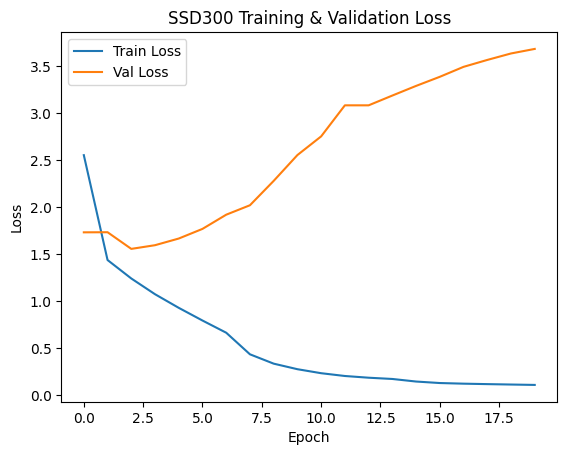

In [ ]:
# 1. Imports & AMP setup
import os
import torch
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

import torchvision
from torchvision.datasets import CocoDetection
from torchvision.models.detection.ssd import SSD300_VGG16_Weights, SSDClassificationHead
import torchvision.transforms.functional as F
from torch.amp import autocast, GradScaler

# 2. Paths & Hyperparameters
ROOT        = "/content/License-Plate-Recognition-4"
TRAIN_DIR   = os.path.join(ROOT, "train", "images_resized")
VAL_DIR     = os.path.join(ROOT, "valid", "images_resized")
TRAIN_JSON  = os.path.join(TRAIN_DIR, "_annotations.coco.json")
VAL_JSON    = os.path.join(VAL_DIR,   "_annotations.coco.json")

BATCH_SIZE, NUM_WORKERS = 64, 2
LR, EPOCHS             = 1e-4, 20
STEP_SIZE, GAMMA       = 7, 0.2
NUM_CLASSES            = 2   # background + plate
DEVICE                 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE_TYPE            = DEVICE.type  # "cuda" or "cpu"

# 3. Normalization (ImageNet)
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]
def transform(img, target):
    img_t = F.to_tensor(img)
    img_t = F.normalize(img_t, mean=mean, std=std)
    return img_t, target

# 4. Dataset
class ResizedCocoDataset(CocoDetection):
    def __init__(self, img_folder, ann_file):
        super().__init__(img_folder, ann_file, transforms=None)
    def __getitem__(self, idx):
        img, raw_anns = super().__getitem__(idx)
        boxes_list, labels_list = [], []
        for obj in raw_anns:
            x, y, w, h = obj["bbox"]
            boxes_list.append([x, y, x + w, y + h])
            labels_list.append(obj["category_id"])

        if boxes_list:
            boxes  = torch.tensor(boxes_list, dtype=torch.float32)
            labels = torch.tensor(labels_list, dtype=torch.int64)
        else:
            boxes  = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([self.ids[idx]])
        }
        return transform(img, target)

# 5. DataLoaders
train_ds = ResizedCocoDataset(TRAIN_DIR, TRAIN_JSON)
val_ds   = ResizedCocoDataset(  VAL_DIR,   VAL_JSON)
def collate_fn(batch):
    imgs, tgts = zip(*batch)
    return torch.stack(imgs), list(tgts)

train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=NUM_WORKERS, pin_memory=True, collate_fn=collate_fn
)
val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=NUM_WORKERS, pin_memory=True, collate_fn=collate_fn
)

# 6. Model Setup
weights = SSD300_VGG16_Weights.DEFAULT
model = torchvision.models.detection.ssd300_vgg16(weights=weights)
in_ch, ancs = [512,1024,512,256,256,256], [4,6,6,6,4,4]
model.head.classification_head = SSDClassificationHead(in_ch, ancs, num_classes=NUM_CLASSES)
model.to(DEVICE)

optimizer    = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-2)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)
scaler       = GradScaler()

# 7. Training & Validation Loop (with loss logging & plotting)
train_losses = []
val_losses   = []
best_val = float("inf")

for epoch in range(1, EPOCHS+1):
    # — Training —
    model.train()
    running_train = 0.0
    for imgs, targets in tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS} [Train]"):
        imgs    = imgs.to(DEVICE)
        targets = [{k:v.to(DEVICE) for k,v in t.items()} for t in targets]

        optimizer.zero_grad()
        with autocast(device_type=DEVICE_TYPE):
            loss_dict = model(imgs, targets)
            loss = sum(loss_dict.values())
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        running_train += loss.item()
    lr_scheduler.step()
    avg_train = running_train / len(train_loader)
    train_losses.append(avg_train)

    # — Validation — (keep model in train-mode so it returns loss dict)
    running_val = 0.0
    with torch.no_grad():
        for imgs, targets in tqdm(val_loader, desc=f"Epoch {epoch}/{EPOCHS} [Val]"):
            imgs    = imgs.to(DEVICE)
            targets = [{k:v.to(DEVICE) for k,v in t.items()} for t in targets]
            with autocast(device_type=DEVICE_TYPE):
                loss_dict = model(imgs, targets)
                loss = sum(loss_dict.values())
            running_val += loss.item()
    avg_val = running_val / len(val_loader)
    val_losses.append(avg_val)

    # — Print & Save —
    print(f"Epoch {epoch} → Train Loss: {avg_train:.4f} | Val Loss: {avg_val:.4f}")
    if avg_val < best_val:
        best_val = avg_val
        save_path = "/content/drive/MyDrive/ssd300_best.pth"
        torch.save(model.state_dict(), save_path)
        print(f"💾 Saved best model to {save_path}")

print("✅ Training complete.")

# 8. Plot Loss Curves
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses,   label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SSD300 Training & Validation Loss')
plt.legend()
plt.show()


# **Testing Code**

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


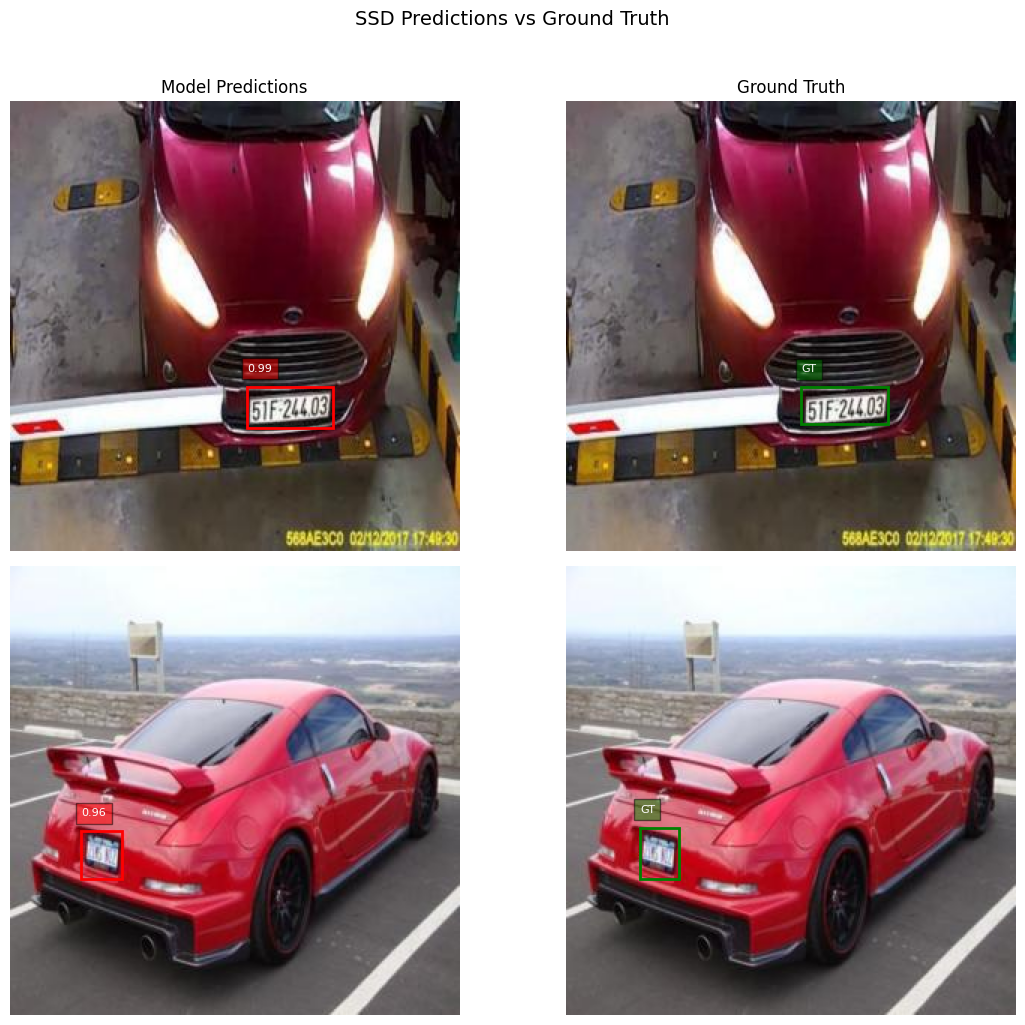

✅ Saved comparison image as 'ssd_prediction_vs_ground_truth.png'


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torchvision.transforms.functional as F
from pycocotools.coco import COCO
import random

# Load your trained model
model.eval()
model.load_state_dict(torch.load("/content/drive/MyDrive/ssd300_best.pth"))  # adjust if needed

# Load COCO annotations
coco = COCO(VAL_JSON)

# Get image IDs with annotations
image_ids = coco.getImgIds()

# Choose 2 random images
selected_ids = random.sample(image_ids, min(2, len(image_ids)))

def plot_predictions_vs_ground_truth(img_id, ax_pred, ax_gt):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(VAL_DIR, img_info['file_name'])
    image = Image.open(img_path).convert("RGB")
    img_tensor = F.normalize(F.to_tensor(image), mean=mean, std=std).unsqueeze(0).to(DEVICE)

    # Run prediction
    with torch.no_grad():
        outputs = model(img_tensor)[0]

    # Display image
    for ax in [ax_pred, ax_gt]:
        ax.imshow(image)
        ax.axis('off')

    # Plot Predictions (Red)
    for box, score, label in zip(outputs['boxes'], outputs['scores'], outputs['labels']):
        if score > 0.6:
            xmin, ymin, xmax, ymax = box.cpu().numpy()
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                     linewidth=2, edgecolor='red', facecolor='none')
            ax_pred.add_patch(rect)
            ax_pred.text(xmin, ymin-10, f"{score:.2f}", color='white',
                         fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Plot Ground Truth (Green)
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        x, y, w, h = ann['bbox']
        rect = patches.Rectangle((x, y), w, h,
                                 linewidth=2, edgecolor='green', facecolor='none')
        ax_gt.add_patch(rect)
        ax_gt.text(x, y-10, "GT", color='white',
                   fontsize=8, bbox=dict(facecolor='green', alpha=0.5))

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("SSD Predictions vs Ground Truth", fontsize=14, y=1.02)

for i, img_id in enumerate(selected_ids):
    plot_predictions_vs_ground_truth(img_id, axes[i, 0], axes[i, 1])

axes[0, 0].set_title("Model Predictions")
axes[0, 1].set_title("Ground Truth")
plt.tight_layout()
plt.savefig("ssd_prediction_vs_ground_truth.png", dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved comparison image as 'ssd_prediction_vs_ground_truth.png'")


In [ ]:
def compute_iou(box1, box2):
    # box = [xmin, ymin, xmax, ymax]
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area != 0 else 0


In [ ]:
import time
import numpy as np

TP = 0
FP = 0
FN = 0

total_time = 0
n_images = 20  # number of images to evaluate, increase as needed
sample_ids = random.sample(image_ids, min(n_images, len(image_ids)))

for img_id in sample_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(VAL_DIR, img_info['file_name'])
    image = Image.open(img_path).convert("RGB")
    img_tensor = F.normalize(F.to_tensor(image), mean=mean, std=std).unsqueeze(0).to(DEVICE)

    # Time the inference
    start = time.time()
    with torch.no_grad():
        outputs = model(img_tensor)[0]
    total_time += time.time() - start

    # Predictions
    pred_boxes = outputs['boxes'].cpu().numpy()
    scores = outputs['scores'].cpu().numpy()
    pred_boxes = [box for i, box in enumerate(pred_boxes) if scores[i] > 0.5]

    # Ground truths
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    gt_boxes = [ann['bbox'] for ann in anns]
    gt_boxes = [[x, y, x+w, y+h] for x, y, w, h in gt_boxes]

    matched_gt = set()
    for pred_box in pred_boxes:
        match_found = False
        for i, gt_box in enumerate(gt_boxes):
            iou = compute_iou(pred_box, gt_box)
            if iou >= 0.5 and i not in matched_gt:
                TP += 1
                matched_gt.add(i)
                match_found = True
                break
        if not match_found:
            FP += 1

    FN += len(gt_boxes) - len(matched_gt)

# Metrics
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
fps = n_images / total_time

print(f"📈 Precision (IoU ≥ 0.5): {precision:.4f}")
print(f"📈 Recall (IoU ≥ 0.5): {recall:.4f}")
print(f"📈 F1-score: {f1:.4f}")
print(f"⚡ Latency (FPS): {fps:.2f}")


📈 Precision (IoU ≥ 0.5): 0.9048
📈 Recall (IoU ≥ 0.5): 0.9048
📈 F1-score: 0.9048
⚡ Latency (FPS): 40.57


# **OCR**

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!

📷 Image: d59b7a0ff294e3be_jpg.rf.8ecf057bf57e2a135c34d8180861549c.jpg
🔍 Detected Text: 

📷 Image: CarLongPlateGen1931_jpg.rf.ed0dbe3fc25c39c983563255e53b2163.jpg
🔍 Detected Text: 61F07973


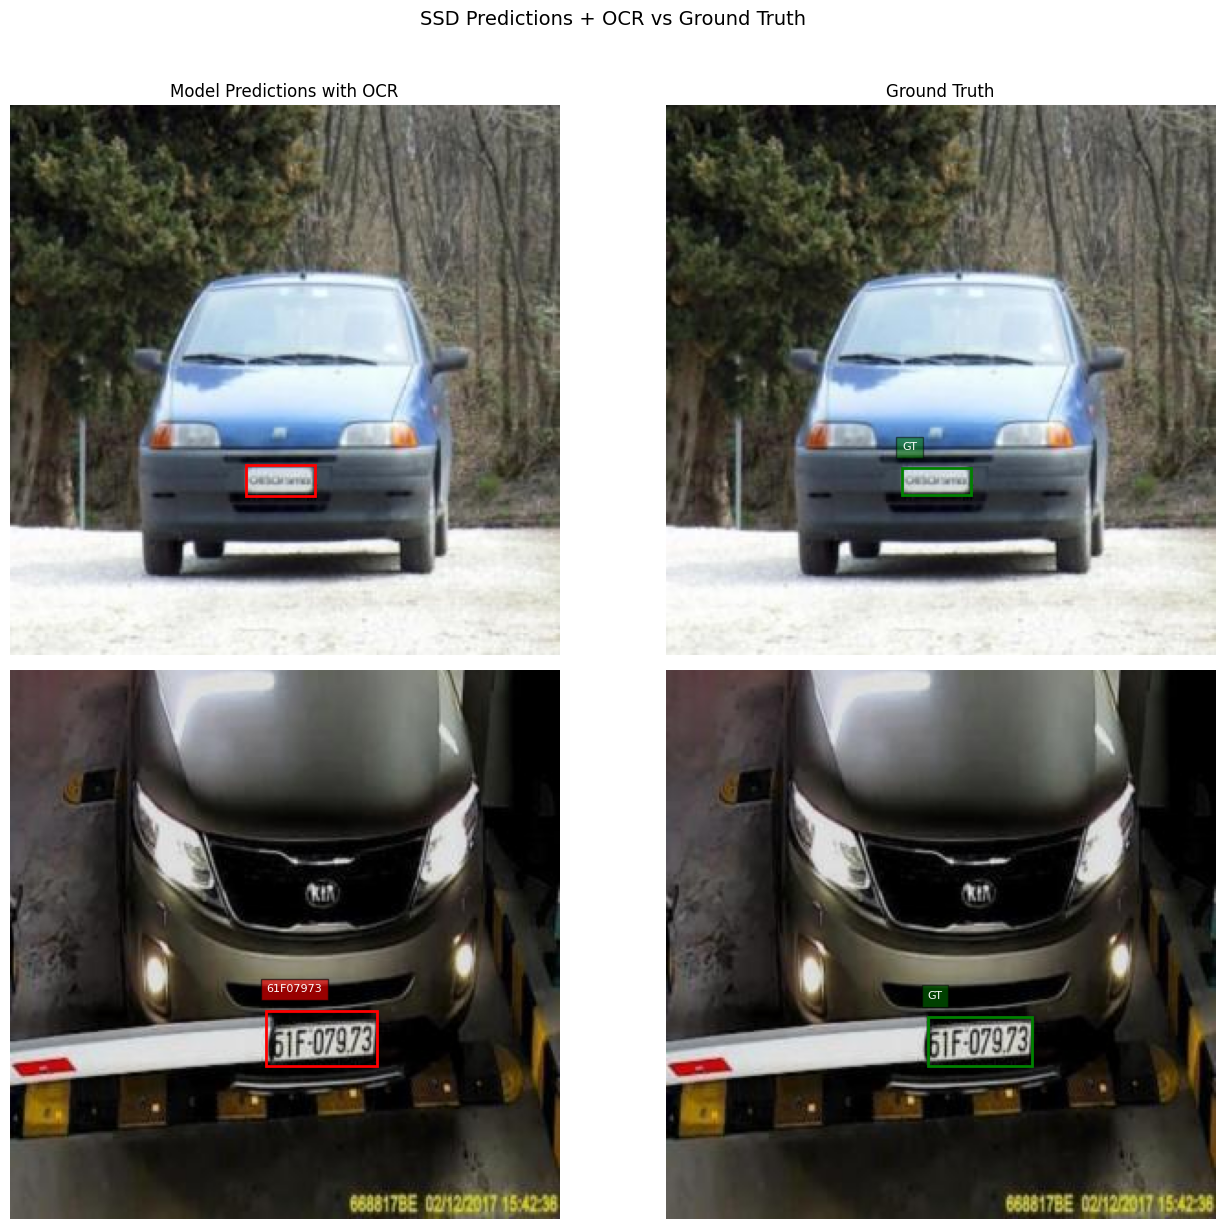


✅ Saved visualization with OCR to 'ssd_ocr_vs_ground_truth.png'


In [10]:
# Install pytesseract Python wrapper
!pip install pytesseract --quiet

# Install the Tesseract-OCR engine
!apt-get update -qq
!apt-get install -y tesseract-ocr

import torch
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torchvision.transforms.functional as F
from pycocotools.coco import COCO
import pytesseract

# ⚙️ Load your trained SSD model
from torchvision.models.detection import ssd300_vgg16
model = ssd300_vgg16(pretrained=False, num_classes=2)  # Update num_classes if needed
MODEL_PATH = "/content/drive/MyDrive/ssd300_best.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
model.to(DEVICE)
model.eval()

# 📂 Dataset paths (updated to use resized images & annotations)
VAL_JSON = "/content/License-Plate-Recognition-4/valid/images_resized/_annotations.coco.json"
VAL_DIR = "/content/License-Plate-Recognition-4/valid/images_resized"

# 🔍 Load COCO annotations
coco = COCO(VAL_JSON)
image_ids = coco.getImgIds()
selected_ids = random.sample(image_ids, min(2, len(image_ids)))

# Normalization values
mean = [0.485, 0.456, 0.406]
std  = [0.229, 0.224, 0.225]

def plot_predictions_with_ocr(img_id, ax_pred, ax_gt):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(VAL_DIR, img_info['file_name'])
    image = Image.open(img_path).convert("RGB")
    img_tensor = F.normalize(F.to_tensor(image), mean=mean, std=std).unsqueeze(0).to(DEVICE)

    # Run prediction
    with torch.no_grad():
        outputs = model(img_tensor)[0]

    # Plot both original images
    for ax in [ax_pred, ax_gt]:
        ax.imshow(image)
        ax.axis('off')

    print(f"\n📷 Image: {img_info['file_name']}")

    # 🔴 Draw Predictions (Red) + OCR
    for box, score in zip(outputs['boxes'], outputs['scores']):
        if score > 0.3:  # lowered threshold
            xmin, ymin, xmax, ymax = box.cpu().numpy()
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                     linewidth=2, edgecolor='red', facecolor='none')
            ax_pred.add_patch(rect)

            # OCR
            crop = image.crop((xmin, ymin, xmax, ymax)).resize((200, 60), Image.BILINEAR)
            text = pytesseract.image_to_string(
                crop,
                config='--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
            ).strip()
            print(f"🔍 Detected Text: {text}")
            ax_pred.text(xmin, ymin-10, f"{text}", color='white',
                         fontsize=8, bbox=dict(facecolor='red', alpha=0.6))

    # 🟢 Ground Truth (Green)
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        x, y, w, h = ann['bbox']
        rect = patches.Rectangle((x, y), w, h,
                                 linewidth=2, edgecolor='green', facecolor='none')
        ax_gt.add_patch(rect)
        ax_gt.text(x, y-10, "GT", color='white',
                   fontsize=8, bbox=dict(facecolor='green', alpha=0.5))

# 📊 Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("SSD Predictions + OCR vs Ground Truth", fontsize=14, y=1.02)

for i, img_id in enumerate(selected_ids):
    plot_predictions_with_ocr(img_id, axes[i, 0], axes[i, 1])

axes[0, 0].set_title("Model Predictions with OCR")
axes[0, 1].set_title("Ground Truth")
plt.tight_layout()
plt.savefig("ssd_ocr_vs_ground_truth.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Saved visualization with OCR to 'ssd_ocr_vs_ground_truth.png'")
